In [5]:
import os
import requests
from tqdm import tqdm

URL = "https://s3.amazonaws.com/argoverse/datasets/av2/tars/sensor/val-002.tar"
OUT = "../backend/data/val-002.tar"
CHUNK_SIZE = 1024 * 1024  # 1 MB

def download(url: str, out_path: str):
    with requests.get(url, stream=True, timeout=60) as r:
        r.raise_for_status()
        total = int(r.headers.get("Content-Length", 0))

        # если файл уже есть (частично/полностью)
        downloaded = os.path.getsize(out_path) if os.path.exists(out_path) else 0
        mode = "ab" if downloaded > 0 else "wb"

        headers = {}
        if downloaded > 0:
            headers = {"Range": f"bytes={downloaded}-"}
            # Перезапрос с Range (resume)
            r.close()
            r = requests.get(url, stream=True, timeout=60, headers=headers)
            r.raise_for_status()

            # content-length будет размер "остатка"
            remaining = int(r.headers.get("Content-Length", 0))
            total = downloaded + remaining

        with open(out_path, mode) as f, tqdm(
            total=total, initial=downloaded, unit="B", unit_scale=True, unit_divisor=1024, desc=os.path.basename(out_path)
        ) as pbar:
            for chunk in r.iter_content(chunk_size=CHUNK_SIZE):
                if chunk:
                    f.write(chunk)
                    pbar.update(len(chunk))

if __name__ == "__main__":
    download(URL, OUT)


val-002.tar: 100%|██████████| 50.6G/50.6G [2:05:37<00:00, 5.02MB/s]  


In [9]:
import pandas as pd

df = pd.read_feather("../backend/data/sensor/val/ff0dbfc5-8a7b-3a6e-8936-e5e812e45408/sensors/lidar/315972917759681000.feather")
print(df.head())
print(df.columns)
print(df.shape)

           x          y         z  intensity  laser_number  offset_ns
0 -10.898438  10.679688  1.451172         39             3     559872
1 -10.875000  10.664062  0.126099         16            25     566784
2 -11.265625  11.015625  1.834961         39             7     569088
3 -10.945312  10.742188  0.689453         26            23     576000
4 -10.937500  10.750000  1.070312         22            19     585216
Index(['x', 'y', 'z', 'intensity', 'laser_number', 'offset_ns'], dtype='object')
(101672, 6)


/opt/anaconda3/envs/avsp/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


['ring_rear_right', 'stereo_front_right', 'ring_side_left', 'ring_front_center', 'ring_front_right', 'ring_front_left', 'ring_side_right', 'ring_rear_left', 'stereo_front_left']


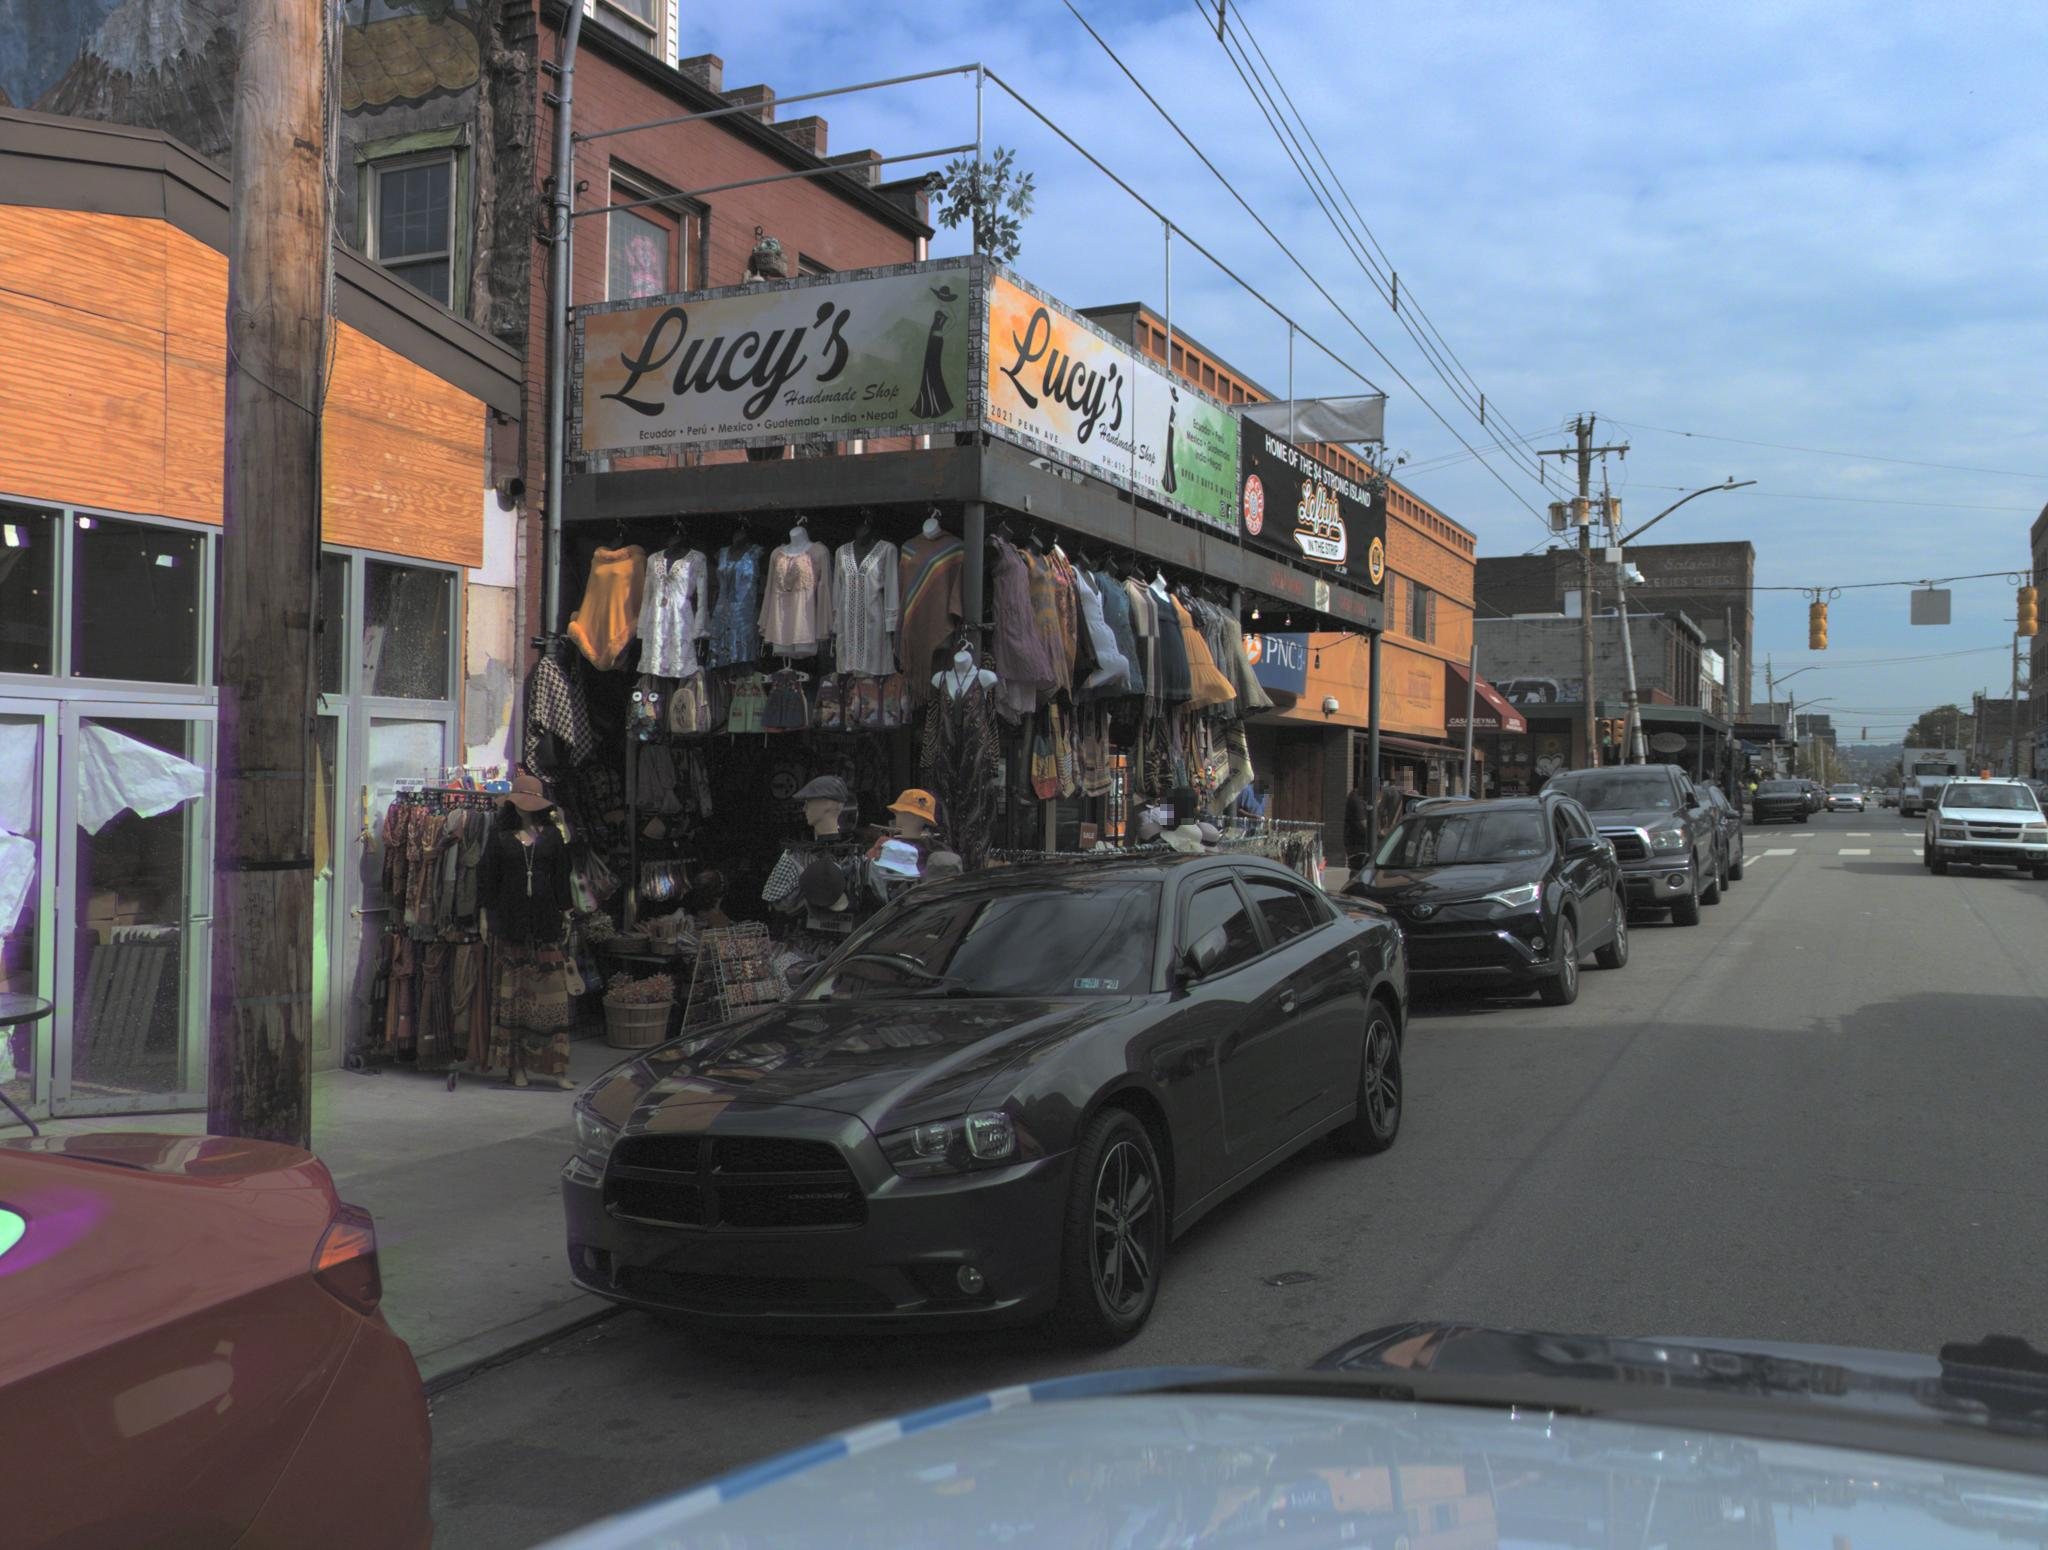

In [47]:
from glob import glob
from PIL import Image

print(os.listdir('../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras'))

Image.open(
    glob('../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_rear_right/*')[-1]
)

In [ ]:
files = glob('../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/*')
set(map(lambda x: x.split('/')[-1], files))

{'ring_front_center',
 'ring_front_left',
 'ring_front_right',
 'ring_rear_left',
 'ring_rear_right',
 'ring_side_left',
 'ring_side_right',
 'stereo_front_left',
 'stereo_front_right'}

In [ ]:
glob('../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_front_center/*')[:5]

['../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_front_center/315977577649927214.jpg',
 '../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_front_center/315977576899927223.jpg',
 '../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_front_center/315977588149927218.jpg',
 '../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_front_center/315977578999927222.jpg',
 '../backend/data/sensor/val/f1275002-842e-3571-8f7d-05816bc7cf56/sensors/cameras/ring_front_center/315977585799927222.jpg']

In [36]:
import datetime

ts_ns = 315977576899927223
dt = datetime.datetime.utcfromtimestamp(ts_ns / 1e9)
print(dt)




1980-01-06 03:32:56.899927
